# Countries of the World EDA

### Exploratory Data Analysis:

Abstract: 
- Aim - To find factors affecting GDP ($ per capita) of the countries in order to make a predictive model. Also, to perform exploratory data analysis to make sure the data fed in the model is consistent and free of null values
The model is made using he data of 227 countries from the dataset ([Reference](#1))
- Method used - The model is built using Linear regression concept
- Findings/Results - Predicted the model(testing model) to have an accuracy of 70 percent with the the training model


In [162]:
#Importing the necessary libraries
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization and styling of graphs
from matplotlib import pyplot as plt #visualization

import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [163]:
# importing the dataset:"Countries of the world"
df=pd.read_csv("countries of the world.csv", decimal = ',')

Displaying the first 5 rows of the given dataset, so that we can see what sort of data we are dealing with.

In [164]:
#Describes the header of the dataset,i.e. top 5 observations of the table
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Displaying the statistical values of the dataframe:

In [165]:
#Describes statistical analysis of the dataset and generates descriptive statistics of the dataframe
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Checking for the null values and displaying the result:

In [166]:
df.isnull().values.any() 

True

In [167]:
#Gives the number of missing values and table overview
print('number of missing data:')
# .isnull() checks which column has got null values and .sum() provides total number of null values/column
print(df.isnull().sum()) 

number of missing data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


In [168]:
#Calculating total and percentage of the given column
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


Calculating the sum of null values:

In [169]:
df.isnull().sum().sum()

110

How to find the missing values?
Plotting the graph with GDP values (to see what sort of distribution the dataframe is having)

In [170]:
#Calculating GDP for a particular country
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


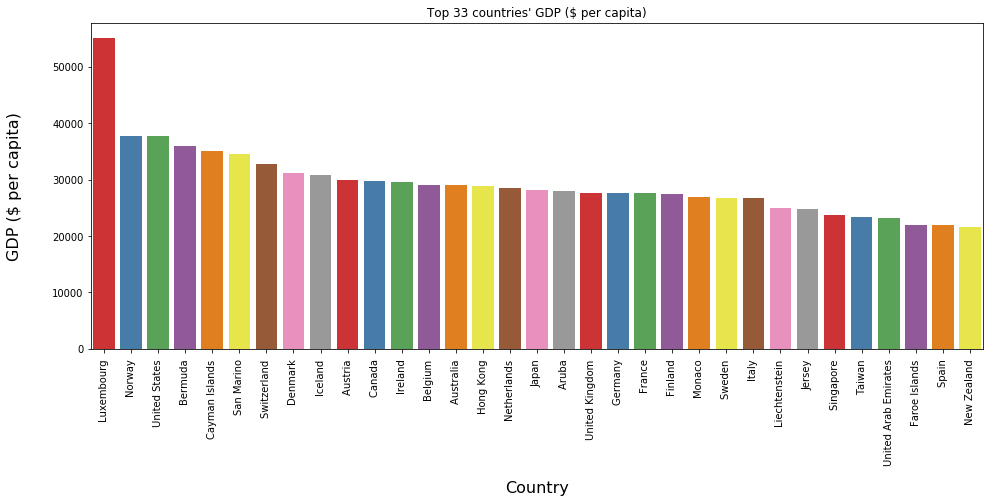

In [171]:
#Plotting of top 33 countries' GDP 
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
ax.set_title("Top 33 countries' GDP ($ per capita)")
plt.xticks(rotation=90)
plt.show()

Barplot of bottom 33 countries:

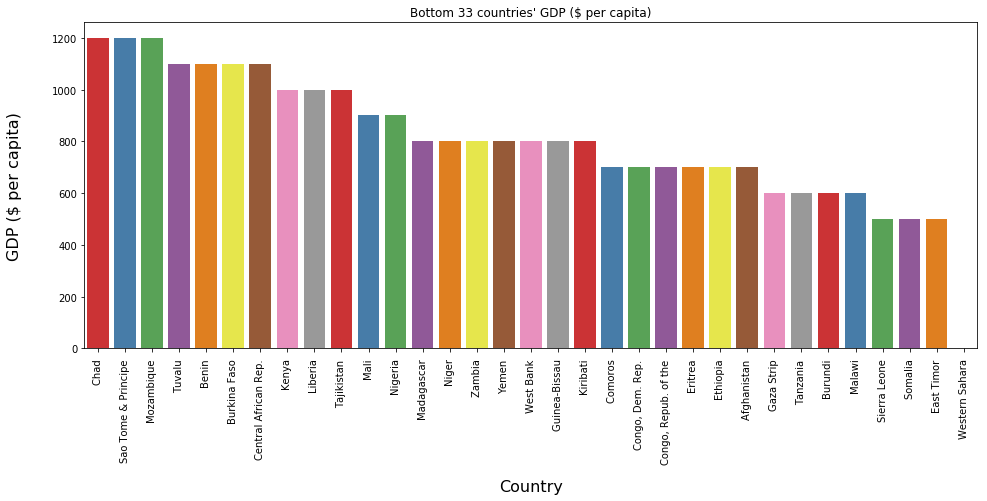

In [172]:
#Plotting of bottom 33 countries' GDP 
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
ax.set_title("Bottom 33 countries' GDP ($ per capita)")
plt.xticks(rotation=90)
plt.show()

By the plots, we can see that is a rightly skewed distribution and for distributions like these, we need median value.
However, for normal distribution we need mean value.

How to find missing values using the median?

We know that there are missing values in the table. We shall fill the missing values with the median of the region that country belongs, as countries that are close geographically are often similar in many ways. Hence, we are grouping it by "Region".
Literacy and Agriculture have been chosen randomly.

In [173]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [174]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max()) #mode is applied on Climate as Climate is a categorical feature
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

C:\Users\ragha\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [175]:
# Checking for null values
df.isnull().values.any()

False

# Data Exploration

### Correlation

Data correlation is the way in which one set of data may correspond to another set.

In [176]:
#Computes pair-wise correlation of columns
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000122,0.024488,-0.038915,-0.051610,-0.029235,0.188337,-0.059617,-0.121118,-0.024329,-0.044151,-0.025974,0.004867,0.105732,-0.087356
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047537,-0.005120,0.072460,0.025954,0.055026,-0.079270,-0.142234,0.137956,0.031986,-0.064822,0.042418,-0.048821,0.127401,-0.057227
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178088,-0.142741,0.196063,0.098487,0.280818,-0.080857,-0.032460,0.082066,0.061828,-0.157909,-0.067910,-0.110235,-0.116734,0.229223
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.133947,-0.138223,0.049561,0.133112,0.153204,-0.120760,0.338889,-0.078312,-0.006490,-0.074021,-0.162705,-0.036301,-0.214819,0.210201
Net migration,0.000122,0.047537,0.178088,-0.133947,1.000000,-0.024876,0.382029,-0.015620,0.239160,-0.059334,-0.344337,0.225740,0.027798,-0.064947,0.033575,-0.107105,-0.019156,0.110103
Infant mortality (per 1000 births),0.024488,-0.005120,-0.142741,-0.138223,-0.024876,1.000000,-0.595432,-0.758702,-0.666699,-0.113607,-0.070197,0.128063,-0.373921,0.844442,0.655891,0.706734,0.028859,-0.640007
GDP ($ per capita),-0.038915,0.072460,0.196063,0.049561,0.382029,-0.595432,1.000000,0.508839,0.832364,0.023937,-0.218093,0.093737,0.361704,-0.643199,-0.196322,-0.585987,-0.034993,0.553994
Literacy (%),-0.051610,0.025954,0.098487,0.133112,-0.015620,-0.758702,0.508839,1.000000,0.587440,0.085269,0.038372,-0.088522,0.425807,-0.776946,-0.376756,-0.594062,0.019528,0.505618
Phones (per 1000),-0.029235,0.055026,0.280818,0.153204,0.239160,-0.666699,0.832364,0.587440,1.000000,0.068853,-0.150700,0.022293,0.436692,-0.721099,-0.253033,-0.599405,-0.158178,0.670933
Arable (%),0.188337,-0.079270,-0.080857,-0.120760,-0.059334,-0.113607,0.023937,0.085269,0.068853,1.000000,0.094614,-0.856770,0.377806,-0.195100,0.060153,-0.023227,-0.048444,0.066550


A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

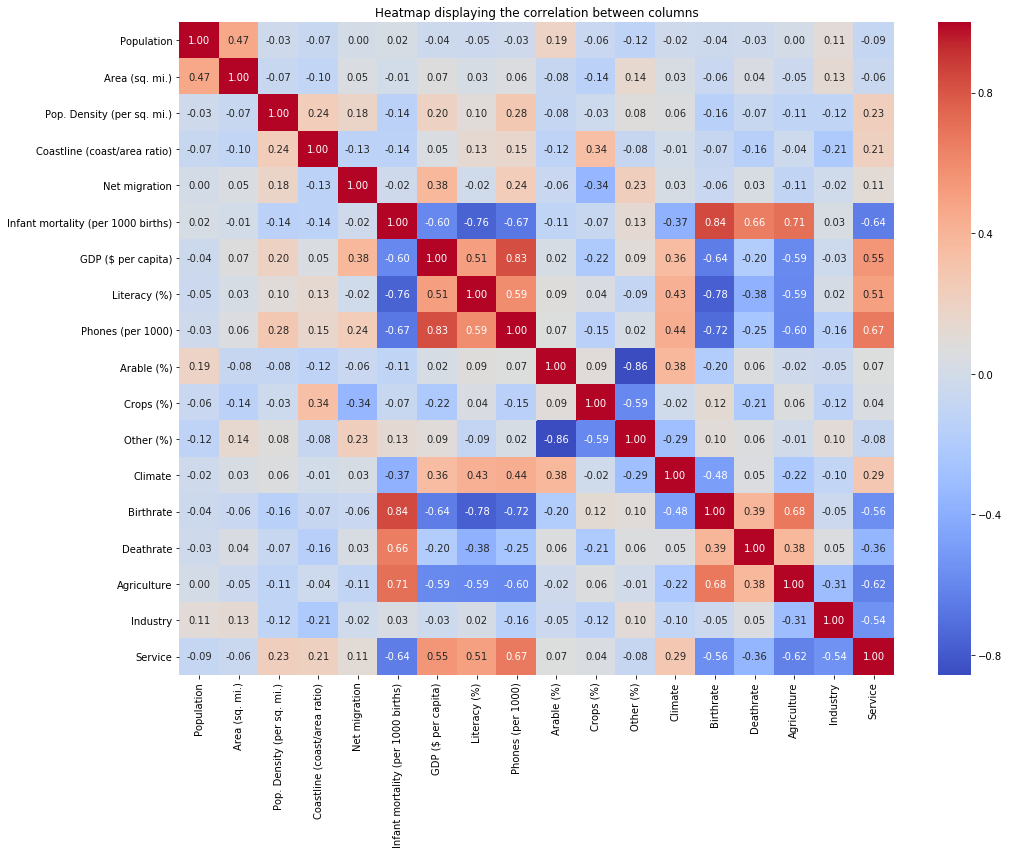

In [177]:
#Plotting heatmap
plt.figure(figsize=(16,12))
ax=plt.axes()
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
ax.set_title("Heatmap displaying the correlation between columns")
plt.show()

Below columns have the highest absolute value correlation with 'GDP_$percapita':
'literacy'
'phones_per_1000'
'infant_mortality_per_1000_births'
'birthrate'
'Agriculture' 

In [178]:
# choose attributes which shows highest absolute value correlation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Agriculture']]

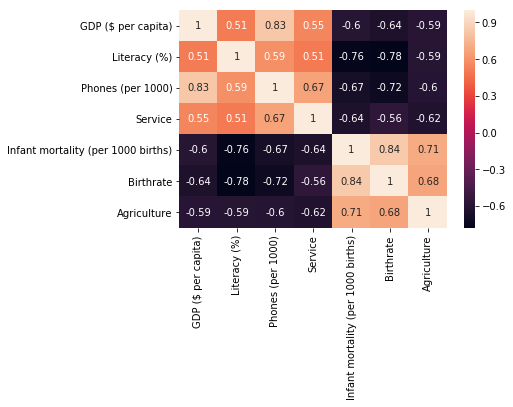

In [179]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

Scatter plot: 
A graph of plotted points that show the relationship between two sets of data. They show how much one variable is affected by another.

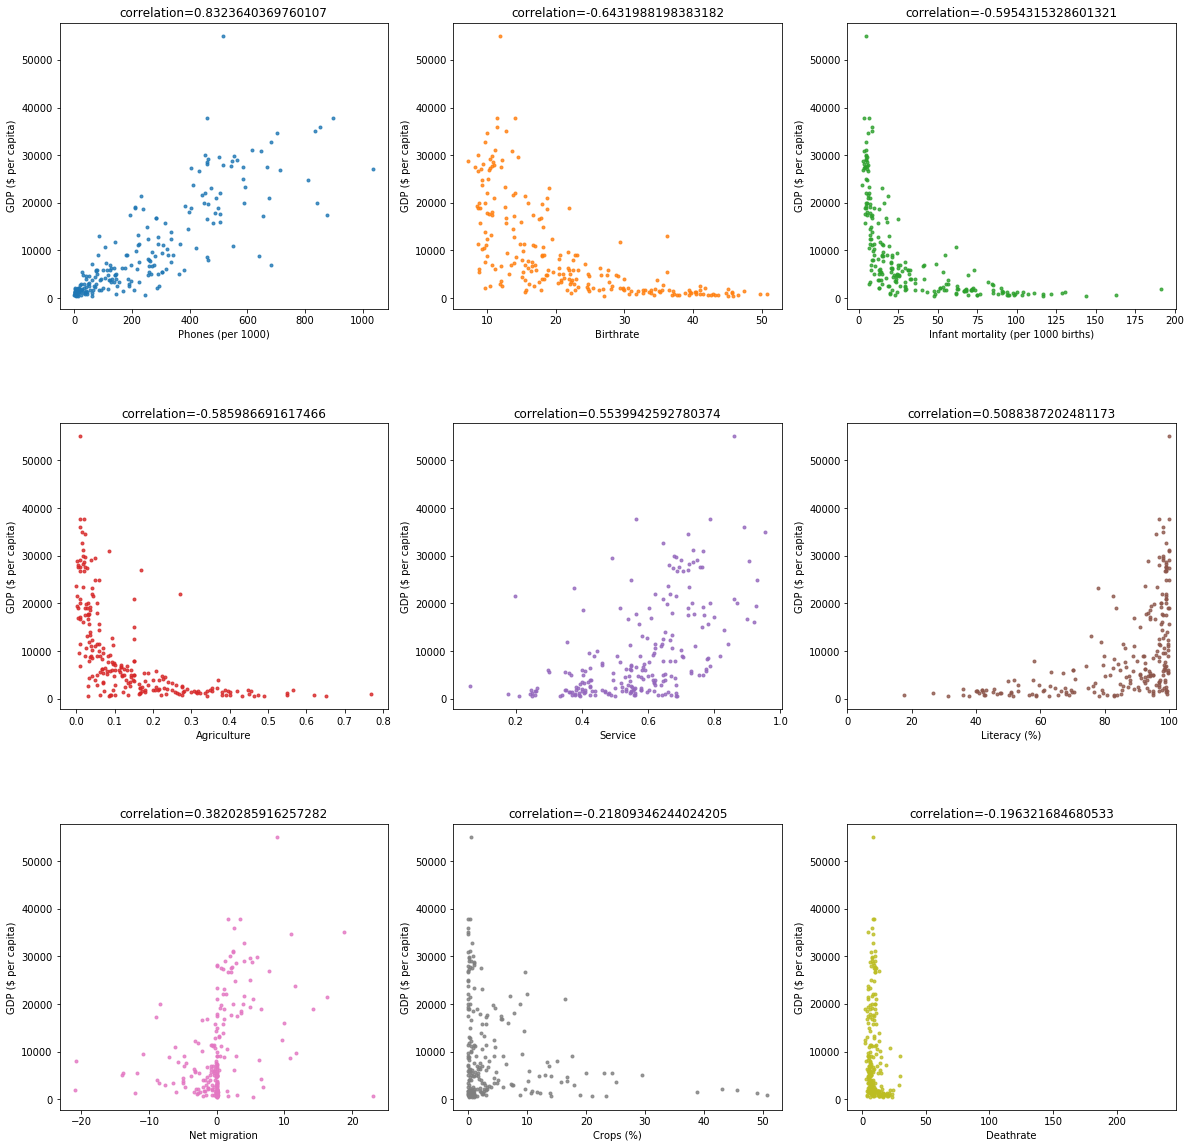

In [180]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [181]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


In [182]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]

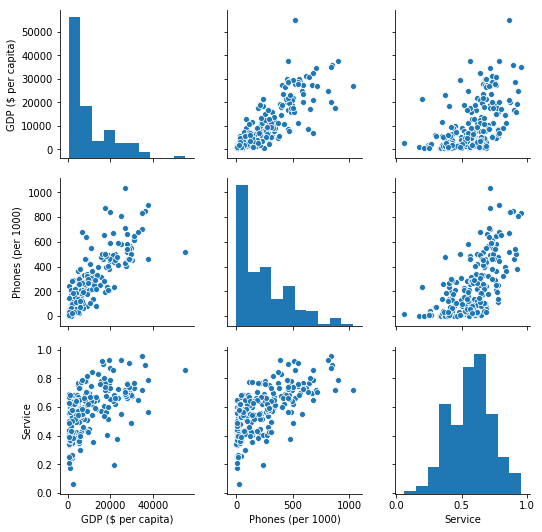

In [216]:
sns.pairplot(x)

Pairs plot are also known as scatterplot matrix. In a pair plot, we can see the distribution for both of the single variables and relationships between two variables(Here, GDP per capita, Phones per (1000) and Service). Here we have grouped our data on basis of regions and then plotted it.

The histogram on the diagonal gives us the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

In [183]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.832364,0.553994
Phones (per 1000),0.832364,1.000000,0.670933
Service,0.553994,0.670933,1.000000


Distplot: Distplot combines the function of the histogram and the KDE(Kernel Density Estimation) plot into one figure.

C:\Users\ragha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


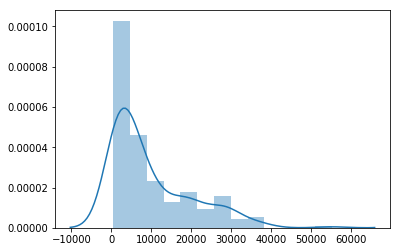

In [208]:
#Density plot has been plotted
sns.distplot(np.array(df['GDP ($ per capita)']))

From the above graph, it can be inferred that the distribution of data is rightly skewed. It is an uni-modal graph.

Boxplot: To read Boxplot, first there is a line at the center, this indicates median value of all the data points. Median is the value at the center when you sort the data from the smallest to the largest.Now, the bottom of the each box indicates 1st quartile or 25th percentile. The top of the each box indicates 3rd quartile or 75th percentile.So the box itself indicates the range of the 50% of the dataLastly, the line at the bottom end of the each line indicates the minimum value and the line at the top end of the each line indicates the max value.

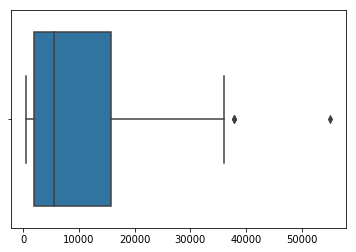

In [209]:
sns.boxplot(np.array(df['GDP ($ per capita)']))

From the graph, it can be inferred that the minimum and maximum value of GDP ($ per capita) is 100 and 36000 respectively. The median has a value of 7000 and 1st quartile = 3000 and 3rd quartile = 17000. There are outliers in the graphs which are outside the maximum values, i.e. 39000 and 56000.

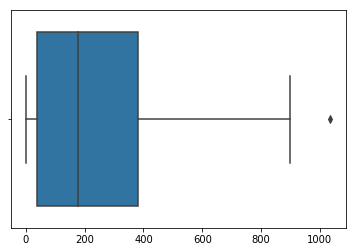

In [186]:
sns.boxplot(np.array(df['Phones (per 1000)']))

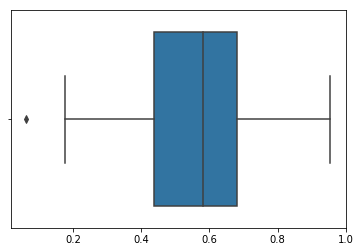

In [187]:
sns.boxplot(np.array(df['Service']))

## Modeling: Training and testing

LabelEncoder can be used to normalize labels.It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

Label encode the categorical feature 'Region' and 'Climate' 

In [188]:
LE = LabelEncoder()
#fit to data and then transform it
df['Regional_label'] = LE.fit_transform(df['Region'])
df['Climate_label'] = LE.fit_transform(df['Climate'])
df.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Regional_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,0.24,97.35,2.0,45.11,24.20,0.0960,0.658,0.246,9,2
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,...,0.00,100.00,2.0,14.17,5.34,0.0400,0.180,0.780,4,2
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,...,4.55,77.27,2.0,16.93,5.37,0.0380,0.220,0.743,4,2
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,...,0.48,87.21,3.0,16.73,7.55,0.0950,0.358,0.547,4,4
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,...,2.30,80.15,4.0,12.07,8.23,0.2390,0.343,0.418,2,5


In [189]:
y=df['GDP ($ per capita)']

training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Regional_label',
       'Climate_label','Service']

Data_Training=df[training_features]

#Preparing Training and testing data set
X_train, X_test, y_train, y_test = train_test_split(Data_Training, y ,test_size=0.33, random_state=7)

Linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 

In [190]:
# Linear Regression Model
model_Linear_Regression = LinearRegression(normalize=True)
model_Linear_Regression.fit(X_train,y_train)
print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.790154
value of Accuracy_test:  0.705934


RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. 

In [215]:
# Calculated rmse and mlse for linear regression  model 
# Following code was taken from Kernel given in the question
train, test = train_test_split(df, test_size=0.30, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Regional_label',
       'Climate_label','Service']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 4985.983840114873 msle_train: 5.309292249457847
rmse_test: 4272.303931292386 msle_test: 2.417979039960169


In [196]:
train_pred_Y1 = model.predict(train_X)
test_pred_Y1 = model.predict(test_X)

In [197]:
np.shape(train_pred_Y1)

(152,)

In [198]:
np.shape(test_pred_Y1)

(75,)

In [210]:
total = df['GDP ($ per capita)']*df['Population'].sum()
print(total)

0      4.566831e+12
1      2.935820e+13
2      3.914427e+13
3      5.219236e+13
4      1.239568e+14
5      1.239568e+13
6      5.610678e+13
7      7.176449e+13
8      7.306930e+13
9      2.283416e+13
10     1.826732e+14
11     1.891973e+14
12     1.957213e+14
13     2.218175e+13
14     1.089515e+14
15     1.102564e+14
16     1.239568e+13
17     1.024275e+14
18     3.979667e+13
19     1.898497e+14
20     3.196782e+13
21     7.176449e+12
22     2.348656e+14
23     8.481258e+12
24     1.565771e+13
25     3.979667e+13
26     5.871640e+13
27     4.958274e+13
28     1.043847e+14
29     1.213472e+14
           ...     
197    2.152935e+13
198    1.526626e+14
199    6.524045e+12
200    3.914427e+12
201    4.827793e+13
202    9.786067e+12
203    1.435290e+13
204    6.197842e+13
205    4.501591e+13
206    4.371110e+13
207    3.783946e+13
208    6.263083e+13
209    7.176449e+12
210    9.133662e+12
211    3.522984e+13
212    1.513578e+14
213    1.807160e+14
214    2.466089e+14
215    8.350777e+13


### Calculating GDP per country

In [212]:
df['Total_GDP ($)'] = df['GDP ($ per capita)'] * df['Population']
df.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Regional_label,Climate_label,Total_GDP ($)
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0,2.173990e+10
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4,1.611745e+10
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0,1.975805e+11
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2,4.623520e+08
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4,1.352819e+09


# Conclusion:
- By observing the bargraph, we determine that the median is the deciding measure of central tendency.
- Regions are grouped by and median is calculated on GDP, Literacy and Agriculture to find out missing values
- The most correlated columns with GDP are Literacy, Phones_per_1000, Infant_mortality_per_1000_births, Birthrate, Agriculture
- The density plot shows that the GDP is a rightly-skewed graph and uni-modal
- Linear regression model's testing and training accuracy has been calculated and found that testing data is 70% accurate
- RMSE (test) is lesser than RMSE (train)
- The total GDP per capita is calculated and top 5 values has been displayed

# Contribution:

- 70% code from Professor Nik Bear Brown github profile
- 20% code from https://www.kaggle.com/stieranka/predicting-gdp-world-countries/notebook
- 10% code written by me

# Citation:
 Professor Nik Bear Brown Github profile: https://github.com/nikbearbrown/INFO_6105/blob/master/Assignments/Countries_of_the_World_EDA_Assignment_1.ipynb

 
 Kaggle Kernel:
 https://www.kaggle.com/stieranka/predicting-gdp-world-countries
 <a id = '1'></a>

# License:

Copyright 2019 Sindhu Raghavendra


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.